### Clean genres access via API

In [8]:
import pandas as pd

In [9]:
df_genres = pd.read_csv('interm_outputs/book_genres_api.csv')

df_genres = df_genres[df_genres['Genres'] != 'Unknown Genre']

print(len(df_genres))
df_genres.head(5)

194


,ISBN,Title,Genres
0,1841193429,Looking for Lovedu,"Africa, description and travel, Fiction, general"
2,059045174X,The Field Beyond the Outfield,"Children's fiction, Baseball, fiction"
3,1840243503,"Brazil: Life, Blood, Soul","History, Nonfiction, Travel, Description and t..."
4,1884956173,Damn! Why didn't I write that?,"Authorship, Marketing, Authorship, marketing"
5,067973385X,Exile and the kingdom,"French language materials, Foreign languages, ..."


In [20]:
# Function to split genres and count occurrences
def count_genres(genre_str):
    # Split the genre string by commas and strip extra spaces
    genres = [genre.strip().lower() for genre in genre_str.split(',')]

    ## replace 'history' with 'historical' to avoid duplicates
    genres = [genre.replace('history', 'historical') for genre in genres]

    ### Remove duplicates
    genres = list(set(genres))
    
    return genres


### Count all genres

In [21]:
# Apply the count_genres function to the 'Genres' column
df_genres['Genres List'] = df_genres['Genres'].apply(count_genres)
df_genres

,ISBN,Title,Genres,Genres List,Major_genre
0,1841193429,Looking for Lovedu,"Africa, description and travel, Fiction, general","[africa, description and travel, general, fict...",Fiction
2,059045174X,The Field Beyond the Outfield,"Children's fiction, Baseball, fiction","[baseball, children's fiction, fiction]",Fiction
3,1840243503,"Brazil: Life, Blood, Soul","History, Nonfiction, Travel, Description and t...","[description and travel, historical, nonfictio...",Fiction
4,1884956173,Damn! Why didn't I write that?,"Authorship, Marketing, Authorship, marketing","[marketing, authorship]",Other
5,067973385X,Exile and the kingdom,"French language materials, Foreign languages, ...","[french, cuentos franceses, translations into ...",Fiction
...,...,...,...,...,...
258,1569312532,Ranma 1/2,"manga, Teenage boys, Young adult fiction, Magi...","[martial arts, fiction, martial artists, fciti...",Fiction
260,1853260959,King Lear (Wordsworth Classics) (Wordsworth Cl...,"Drama, King Lear (Legendary character), Father...","[fiction, kings and rulers, tragedies, kings, ...",Fiction
261,1886155003,The magic mirror of M.C. Escher,"Composition (Art), Escher, m. c. (maurits corn...","[escher, composition (art), 1898-1970, m. c. (...",Other
263,1561791016,Strange journey back,"Conduct of life, Divorce, Fiction, Friendship,...","[fiction, friendship, time travel, conduct of ...",Fiction


In [22]:
# Function to categorize based on the presence of 'fiction' in the Genres List
def categorize_major_genre(genres_list):
    # Check if any element in the Genres List contains the substring 'fiction' (case-insensitive)
    if any('fiction' in genre.lower() for genre in genres_list):
        return 'Fiction'
    else:
        return 'Other'

# Apply the categorization function to the Genres List
df_genres['Major_genre'] = df_genres['Genres List'].apply(categorize_major_genre)

df_genres

,ISBN,Title,Genres,Genres List,Major_genre
0,1841193429,Looking for Lovedu,"Africa, description and travel, Fiction, general","[africa, description and travel, general, fict...",Fiction
2,059045174X,The Field Beyond the Outfield,"Children's fiction, Baseball, fiction","[baseball, children's fiction, fiction]",Fiction
3,1840243503,"Brazil: Life, Blood, Soul","History, Nonfiction, Travel, Description and t...","[description and travel, historical, nonfictio...",Fiction
4,1884956173,Damn! Why didn't I write that?,"Authorship, Marketing, Authorship, marketing","[marketing, authorship]",Other
5,067973385X,Exile and the kingdom,"French language materials, Foreign languages, ...","[french, cuentos franceses, translations into ...",Fiction
...,...,...,...,...,...
258,1569312532,Ranma 1/2,"manga, Teenage boys, Young adult fiction, Magi...","[martial arts, fiction, martial artists, fciti...",Fiction
260,1853260959,King Lear (Wordsworth Classics) (Wordsworth Cl...,"Drama, King Lear (Legendary character), Father...","[fiction, kings and rulers, tragedies, kings, ...",Fiction
261,1886155003,The magic mirror of M.C. Escher,"Composition (Art), Escher, m. c. (maurits corn...","[escher, composition (art), 1898-1970, m. c. (...",Other
263,1561791016,Strange journey back,"Conduct of life, Divorce, Fiction, Friendship,...","[fiction, friendship, time travel, conduct of ...",Fiction


In [23]:
### Count major genres

major_genre_counts = df_genres['Major_genre'].value_counts()
major_genre_counts

Major_genre
Fiction    106
Other       88
Name: count, dtype: int64

In [24]:
df_genres_clean = df_genres.loc[:, ['ISBN', 'Title','Major_genre','Genres List']]

df_genres_clean.rename(columns={'Genres List': 'Genres_list', 'Major_genre': 'Genre_category'}, inplace=True)
df_genres_clean.head(5)

,ISBN,Title,Genre_category,Genres_list
0,1841193429,Looking for Lovedu,Fiction,"[africa, description and travel, general, fict..."
2,059045174X,The Field Beyond the Outfield,Fiction,"[baseball, children's fiction, fiction]"
3,1840243503,"Brazil: Life, Blood, Soul",Fiction,"[description and travel, historical, nonfictio..."
4,1884956173,Damn! Why didn't I write that?,Other,"[marketing, authorship]"
5,067973385X,Exile and the kingdom,Fiction,"[french, cuentos franceses, translations into ..."


In [25]:
df_genres_clean.to_csv('interm_outputs/book_genres_clean.csv', index=False)

#### Analyze number of each category - for exploreation

In [26]:
from collections import Counter

In [27]:
# Flatten the list of genres across all books
all_genres = [genre for genres in df_genres['Genres List'] for genre in genres]

# Count the occurrence of each genre using Counter
genre_counts = Counter(all_genres)


## Sort genre counts
genre_counts

Counter({'fiction': 100,
         'general': 60,
         'historical': 31,
         'large type books': 24,
         'romance': 19,
         'social life and customs': 14,
         'biography': 14,
         "children's fiction": 13,
         'fantasy': 12,
         'mystery & detective': 12,
         'united states': 12,
         'juvenile fiction': 10,
         'romans': 10,
         'science fiction': 9,
         'man-woman relationships': 9,
         'nouvelles': 9,
         'thrillers': 8,
         'suspense': 8,
         'women': 8,
         'fantasy fiction': 7,
         'comic books': 7,
         'strips': 7,
         'contemporary': 7,
         'american': 7,
         'drama': 6,
         'adventure stories': 6,
         'open library staff picks': 6,
         'action & adventure': 6,
         'literature': 6,
         'etc.': 6,
         'new york times reviewed': 6,
         'authors': 6,
         'murder': 6,
         'families': 6,
         'translations into english': 5,


In [33]:
# Optional: You can create a new DataFrame to store genre counts
genre_count_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

## Sort the genres by count
genre_count_df = genre_count_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

genre_count_df['Percentage'] = round(genre_count_df['Count'] / genre_count_df['Count'].sum() * 100,2)

genre_count_df.head(10)

,Genre,Count,Percentage
0,fiction,100,4.82
1,general,60,2.89
2,historical,31,1.49
3,large type books,24,1.16
4,romance,19,0.92
5,biography,14,0.67
6,social life and customs,14,0.67
7,children's fiction,13,0.63
8,united states,12,0.58
9,fantasy,12,0.58


C:\Users\jantimko\AppData\Local\Temp\ipykernel_9608\2058214333.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_count_df.head(10), palette='viridis')


Text(0, 0.5, 'Genre')

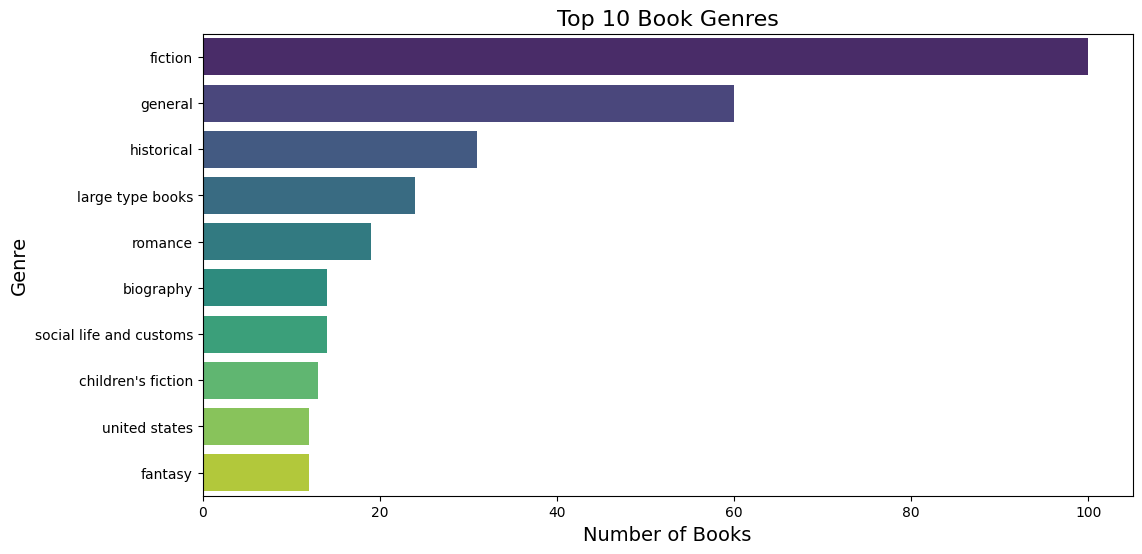

In [34]:
### Plot the bar chart of the top 10 genres using seaborn

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='Count', y='Genre', data=genre_count_df.head(10), palette='viridis')

# Set the title and labels
plt.title('Top 10 Book Genres', fontsize=16)
plt.xlabel('Number of Books', fontsize=14)
plt.ylabel('Genre', fontsize=14)


# Set 